In [2]:
import numpy as np  #Importa libreria numerica 
import sympy as sym #simbolica
sym.init_printing() #activa a jupyter para mostrar simbolicamente el output

# Ganancias

In [3]:
v1, v2, Vo          = sym.symbols('v_1,v_2,Vo')
Rin,Rf,R        = sym.symbols('R_in,R_f,R')
vo              = sym.Function('v_o')(v1,v2)
sym.pprint(vo)
#ganancias:
eq1             = sym.Eq(vo.subs(v2,0),-v1*(Rf/R))
sym.pprint(eq1)
eq2             = sym.Eq(vo.subs(v1,0),-v2*(Rf/R))
sym.pprint(eq2)
eq3             = sym.Eq(vo,eq1.rhs+eq2.rhs)
sym.pprint(sym.simplify(eq3))

vₒ(v₁, v₂)
            -R_f⋅v₁ 
vₒ(v₁, 0) = ────────
               R    
            -R_f⋅v₂ 
vₒ(0, v₂) = ────────
               R    
             -R_f⋅(v₁ + v₂) 
vₒ(v₁, v₂) = ───────────────
                    R       


# Calculo de resistencias

## Rin = 50 ohm

In [4]:
eq_Rin          = sym.Eq(Rin,50)
sym.pprint(eq_Rin)
eq_R            = sym.Eq(R,10*Rin)
sym.pprint(eq_R)
sym.pprint(sym.Eq(R,eq_R.rhs.subs(Rin,eq_Rin.rhs)))
eq_Rf           = sym.Eq(Rf,30*eq_R.rhs)
sym.pprint(eq_Rf)
sym.pprint(sym.Eq(Rf,30*eq_R.rhs.subs(Rin,eq_Rin.rhs)))

Rᵢₙ = 50
R = 10⋅Rᵢₙ
R = 500
R_f = 300⋅Rᵢₙ
R_f = 15000


## Rin = 100k ohm

In [5]:
eq_Rin          = sym.Eq(Rin,100e3)
sym.pprint(eq_Rin)
eq_R            = sym.Eq(R,10*Rin)
sym.pprint(eq_R)
eq_Rf           = sym.Eq(Rf,30*eq_R.rhs)
sym.pprint(eq_Rf)
print('Reemplazando: ')
eq_R            = sym.Eq(R,eq_R.rhs.subs(Rin,eq_Rin.rhs)) 
sym.pprint(eq_R)
sym.pprint("{:.1e}".format(eq_R.rhs))
eq_Rf           = sym.Eq(Rf,30*eq_R.rhs.subs(Rin,eq_Rin.rhs))
sym.pprint(eq_Rf)
sym.pprint("{:.1e}".format(eq_Rf.rhs))


Rᵢₙ = 100000.0
R = 10⋅Rᵢₙ
R_f = 300⋅Rᵢₙ
Reemplazando: 
R = 1000000.0
1.0e+6
R_f = 30000000.0
3.0e+7


# Caso de Rf > 1Meg[ohm]
## Se emplea una red T para solucionar este problema
![image](red_T.png)

In [6]:
voTh,iF,vx = sym.symbols('vo_th,i_f,v_x')
Ra,Rb,Rc,P_RaRc    = sym.symbols('Ra,Rb,Rc,P_Ra_Rc')
eq4         = sym.Eq(iF,vx/Ra)
sym.pprint(eq4)
eq_Pall_Ra_Rc = sym.Eq(P_RaRc,1/((1/Ra)+(1/Rc)))
eq_Pall_Ra_Rc = sym.simplify(eq_Pall_Ra_Rc) 
sym.pprint(eq_Pall_Ra_Rc)
eq5         = sym.Eq(vx,voTh*(eq_Pall_Ra_Rc.rhs/(eq_Pall_Ra_Rc.rhs+Rb)))
sym.pprint(eq5)
eq6         = sym.Eq(eq4.lhs,eq4.rhs.subs(vx,eq5.rhs))
sym.pprint(eq6)
eq6         = sym.separatevars(sym.simplify(eq6),force=True) 
sym.pprint(eq6)
print('Con: ')
eq7         = sym.Eq(Rf,voTh/iF)
sym.pprint(eq7)
print('Resulta: ')
eq_Rf_T     = sym.Eq(Rf,(1/eq6.rhs)*voTh)
sym.pprint(eq_Rf_T)

      vₓ
i_f = ──
      Ra
           Ra⋅Rc 
P_Ra_Rc = ───────
          Ra + Rc
            Ra⋅Rc⋅voₜₕ       
vₓ = ────────────────────────
               ⎛ Ra⋅Rc      ⎞
     (Ra + Rc)⋅⎜─────── + Rb⎟
               ⎝Ra + Rc     ⎠
              Rc⋅voₜₕ         
i_f = ────────────────────────
                ⎛ Ra⋅Rc      ⎞
      (Ra + Rc)⋅⎜─────── + Rb⎟
                ⎝Ra + Rc     ⎠
             Rc⋅voₜₕ       
i_f = ─────────────────────
      Ra⋅Rb + Ra⋅Rc + Rb⋅Rc
Con: 
      voₜₕ
R_f = ────
      i_f 
Resulta: 
      Ra⋅Rb + Ra⋅Rc + Rb⋅Rc
R_f = ─────────────────────
                Rc         


## Calculos de Ra,Rb,Rc

In [7]:
eq_Rc       = sym.Eq(Rc,sym.solve(eq_Rf_T,Rc)[0])#el [0] es por que solve devuelve una lista
sym.pprint(eq_Rc)
#Reemplazando y estableciendo Ra=150k;Rb=200k
eq_Rc_val   = sym.Eq(Rc,eq_Rc.rhs.subs({Ra:150e3,Rb:200e3,Rf:eq_Rf.rhs}))
sym.pprint(eq_Rc_val)

         Ra⋅Rb    
Rc = ─────────────
     R_f - Ra - Rb
Rc = 1011.80438448567


# Errores en DC
![image](circ_por_black.png)

## Caso de Rin = 50 ohm
### Ganancias

In [8]:
Af,Av,T,Ad  = sym.symbols('A_f,A_v,T,Ad')
#Ganancia de a lazo abierto
#Av = Vo/(V1+V2)
# aplico superposicion
# Vo/V1 = v-/V1 * Vo/v- con V2=0
eq8         = sym.Eq(Vo/v1,(((R**-1+Rf**-1)**-1)/(((R**-1+Rf**-1)**-1)+R))*-Ad*v1)
sym.pprint(eq8)
eq9         = sym.Eq(Vo/v2,(((R**-1+Rf**-1)**-1)/(((R**-1+Rf**-1)**-1)+R))*-Ad*v2)
sym.pprint(eq9)
eq10        = sym.Eq(Vo,(eq9.rhs+eq8.rhs))
sym.pprint(sym.simplify(eq10))
eq_Av       = sym.Eq(Av,(-Ad*Rf)/(R+(2*Rf)))
sym.pprint(eq_Av)



Vo           -Ad⋅v₁         
── = ───────────────────────
v₁   ⎛       1   ⎞ ⎛ 1    1⎞
     ⎜R + ───────⎟⋅⎜─── + ─⎟
     ⎜     1    1⎟ ⎝R_f   R⎠
     ⎜    ─── + ─⎟          
     ⎝    R_f   R⎠          
Vo           -Ad⋅v₂         
── = ───────────────────────
v₂   ⎛       1   ⎞ ⎛ 1    1⎞
     ⎜R + ───────⎟⋅⎜─── + ─⎟
     ⎜     1    1⎟ ⎝R_f   R⎠
     ⎜    ─── + ─⎟          
     ⎝    R_f   R⎠          
     -Ad⋅R_f⋅(v₁ + v₂) 
Vo = ──────────────────
         R + 2⋅R_f     
      -Ad⋅R_f 
Aᵥ = ─────────
     R + 2⋅R_f


#### Ganancia de lazo para el caso Rin=50

In [9]:

#T = Vo/V' = Vo/V- * V-/V'
eq_T        = sym.Eq(T,(((R**-1+R**-1)**-1)/(((R**-1+R**-1)**-1)+Rf))*-Ad)
sym.pprint(eq_T)
eq_T        = sym.simplify(eq_T)
sym.pprint(eq_T)



       -Ad⋅R   
T = ───────────
      ⎛R      ⎞
    2⋅⎜─ + R_f⎟
      ⎝2      ⎠
      -Ad⋅R  
T = ─────────
    R + 2⋅R_f


#### Ganancia de lazo para el caso Rin=100k
![image](ganancia_T_con_red_T.png)

In [10]:
# T = voo/vt = vx/vt * v-/vx * voo/v-
vx,T_Rf,vt,vneg  = sym.symbols('V_x,T_Rf,vt,v^-')
eq_vx_vt    = sym.Eq(vx/vt,Rc/(Rc+Rb))
sym.pprint(eq_vx_vt)
eq_vneg_vx    = sym.Eq(vneg/vx,(((1/R+1/R))**-1)/(Ra+(((1/R+1/R))**-1)))
sym.pprint(eq_vneg_vx) 
#voo/v- = -Ad
eq_T_new    = sym.Eq(T_Rf,-Ad*eq_vx_vt.rhs*eq_vneg_vx.rhs)
sym.pprint(eq_T_new)
sym.pprint(sym.sympify(eq_T_new))
eq_T_new_val = eq_T_new.subs({Ad:100e3,R:1e6,Ra:150e3,Rb:200e3,Rc:1e3})
sym.pprint(eq_T_new_val)

Vₓ      Rc  
── = ───────
vt   Rb + Rc
v⁻       R     
── = ──────────
Vₓ     ⎛R     ⎞
     2⋅⎜─ + Ra⎟
       ⎝2     ⎠
            -Ad⋅R⋅Rc       
T_Rf = ────────────────────
         ⎛R     ⎞          
       2⋅⎜─ + Ra⎟⋅(Rb + Rc)
         ⎝2     ⎠          
            -Ad⋅R⋅Rc       
T_Rf = ────────────────────
         ⎛R     ⎞          
       2⋅⎜─ + Ra⎟⋅(Rb + Rc)
         ⎝2     ⎠          
T_Rf = -382.701875239189


In [53]:
#Ganancia de lazo cerrado
eq_Af       = sym.Eq(Af,eq_Av.rhs/(1-eq_T.rhs))
sym.pprint(eq_Af)
eq_Af       = sym.simplify(eq_Af)
sym.pprint(eq_Af)
#Reemplazando
sym.pprint(eq_Af.subs({R:500,Rf:15e3,Ad:200e3}))

#Caso 2 Rin=100k
eq_Af_new       = sym.Eq(Af,eq_Av.rhs/(1-eq_T_new.rhs))
sym.pprint(eq_Af_new)
eq_Af_new       = sym.simplify(eq_Af_new)
sym.pprint(eq_Af_new)
sym.pprint(eq_Af.subs({Ad:100e3,R:1e6,Ra:150e3,Rb:200e3,Rc:1e3,Rf:30e6}))

                -Ad⋅R_f          
A_f = ───────────────────────────
                  ⎛   Ad⋅R      ⎞
      (R + 2⋅R_f)⋅⎜───────── + 1⎟
                  ⎝R + 2⋅R_f    ⎠
          -Ad⋅R_f     
A_f = ────────────────
      Ad⋅R + R + 2⋅R_f
A_f = -29.9908527898991
                     -Ad⋅R_f                
A_f = ──────────────────────────────────────
                  ⎛      Ad⋅R⋅Rc           ⎞
      (R + 2⋅R_f)⋅⎜──────────────────── + 1⎟
                  ⎜  ⎛R     ⎞              ⎟
                  ⎜2⋅⎜─ + Ra⎟⋅(Rb + Rc)    ⎟
                  ⎝  ⎝2     ⎠              ⎠
             -Ad⋅R_f⋅(R + 2⋅Ra)⋅(Rb + Rc)         
A_f = ────────────────────────────────────────────
      (R + 2⋅R_f)⋅(Ad⋅R⋅Rc + (R + 2⋅Ra)⋅(Rb + Rc))
A_f = -29.9817111561947


### Error por Vos
![image](error_vos.png)

In [12]:
vos,dvo_vos         = sym.symbols('V_os,\Delta_Vo')
#Ganancia a lazo abierto en este caso es Vo/Vos = Ad
print("Caso 1, Rin=50")
eq_error_vos    = sym.Eq(dvo_vos,(Ad*vos)/(1-eq_T.rhs))
sym.pprint(eq_error_vos)
sym.pprint(sym.simplify(eq_error_vos))
#Tomando el limite Ad-->inf
print("Tomando el limite para Ad-->inf")
eq_error_vos_lim = sym.Eq(dvo_vos,sym.limit_seq(sym.simplify(eq_error_vos.rhs),Ad))
sym.pprint(eq_error_vos_lim)
eq_error_vos_val =  eq_error_vos.subs({Ad:100e3,vos:2e-3,R:1e6,Rf:30e6})
sym.pprint(eq_error_vos_val)
# sym.print_latex(sym.simplify(eq_error_vos))

print('*'*60)
print('Caso 2, Rin=100k')
eq_error_vos_new = sym.Eq(dvo_vos,(Ad*vos/(1-eq_T_new.rhs)))
sym.pprint(eq_error_vos_new)
print("Tomando el limite para Ad-->inf")
eq_error_vos_new_lim = sym.Eq(dvo_vos,sym.limit_seq(sym.simplify(eq_error_vos_new.rhs),Ad))
sym.pprint(eq_error_vos_new_lim)
# sym.print_latex(eq_error_vos_new_lim)
# eq_error_vos_new_val =  eq_error_vos_new.subs({Ad:100e3,R:1e6,Ra:150e3,Rb:200e3,Rc:1e3})
# sym.pprint(eq_error_vos_new_val)
eq_error_vos_new_val =  eq_error_vos_new.subs({Ad:100e3,vos:2e-3,R:1e6,Ra:150e3,Rb:200e3,Rc:1e3})
sym.pprint(eq_error_vos_new_val)

Caso 1, Rin=50
                Ad⋅Vₒₛ   
\Delta_Vo = ─────────────
               Ad⋅R      
            ───────── + 1
            R + 2⋅R_f    
            Ad⋅Vₒₛ⋅(R + 2⋅R_f)
\Delta_Vo = ──────────────────
             Ad⋅R + R + 2⋅R_f 
Tomando el limite para Ad-->inf
            Vₒₛ⋅(R + 2⋅R_f)
\Delta_Vo = ───────────────
                   R       
\Delta_Vo = 0.121925625368525
************************************************************
Caso 2, Rin=100k
                     Ad⋅Vₒₛ         
\Delta_Vo = ────────────────────────
                  Ad⋅R⋅Rc           
            ──────────────────── + 1
              ⎛R     ⎞              
            2⋅⎜─ + Ra⎟⋅(Rb + Rc)    
              ⎝2     ⎠              
Tomando el limite para Ad-->inf
            Vₒₛ⋅(R + 2⋅Ra)⋅(Rb + Rc)
\Delta_Vo = ────────────────────────
                      R⋅Rc          
\Delta_Vo = 0.521238005092693


### Error por corriente Ios
![image](error_ios.png)

In [13]:
Ipol_n,dvo_Ios         = sym.symbols('I_pol-,\Delta_Vo')
#como en la entrada no inversora no hay corriente entonces no produce caida de tension, por lo tanto no hay salida
#pero aumenta el error total
print('Caso 1, Rin=50')
eq_error_Ios        = sym.Eq(dvo_Ios,(Ipol_n*-Ad*-((R**-1+R**-1+Rf**-1)**-1))/(1-eq_T.rhs))
sym.pprint(eq_error_Ios)
sym.pprint(sym.simplify(eq_error_Ios))
# sym.print_latex(sym.simplify(eq_error_Ios))
#Tomando el limite Ad-->inf
sym.pprint(sym.limit_seq(sym.simplify(eq_error_Ios.rhs),Ad))
eq_error_Ios_val = eq_error_Ios.subs({Ad:100e3,Ipol_n:45e-9,R:500,Rf:15e3})
sym.pprint(eq_error_Ios_val)

print('*'*60)
print('Caso 2, Rin=100k')
RR = (((1/R+1/R))**-1)
eq_error_Ios_new        = sym.Eq(dvo_Ios,(Ipol_n*-Ad*-((1/RR+1/(Ra+((Rb**-1+Rc**-1)**-1)))**-1)/(1-eq_T_new.rhs)))
sym.pprint(sym.simplify(eq_error_Ios_new))
print("Tomando el limite para Ad-->inf")
eq_error_Ios_new_lim    = sym.Eq(dvo_Ios,sym.limit_seq(sym.simplify(eq_error_Ios_new.rhs),Ad))
sym.pprint(sym.simplify(eq_error_Ios_new_lim))
# sym.print_latex(sym.simplify(eq_error_Ios_new_lim))
# eq_error_vos_new_val    = eq_error_Ios_new_lim.subs({Ad:100e3,R:1e6,Ra:150e3,Rb:200e3,Rc:1e3})
# sym.pprint(eq_error_vos_new_val)
eq_error_Ios_new_val    = eq_error_Ios_new_lim.subs({Ad:100e3,Ipol_n:45e-9,R:1e6,Ra:150e3,Rb:200e3,Rc:1e3})
sym.pprint(eq_error_Ios_new_val)

Caso 1, Rin=50
                     Ad⋅Iₚₒₗ₋        
\Delta_Vo = ─────────────────────────
            ⎛ 1    2⎞ ⎛   Ad⋅R      ⎞
            ⎜─── + ─⎟⋅⎜───────── + 1⎟
            ⎝R_f   R⎠ ⎝R + 2⋅R_f    ⎠
             Ad⋅Iₚₒₗ₋⋅R⋅R_f 
\Delta_Vo = ────────────────
            Ad⋅R + R + 2⋅R_f
Iₚₒₗ₋⋅R_f
\Delta_Vo = 0.000674588501014381
************************************************************
Caso 2, Rin=100k
                      Ad⋅Iₚₒₗ₋⋅R⋅(R + 2⋅Ra)⋅(Rb + Rc)⋅(Ra⋅(Rb + Rc) + Rb⋅Rc)  
\Delta_Vo = ──────────────────────────────────────────────────────────────────
            (Ad⋅R⋅Rc + (R + 2⋅Ra)⋅(Rb + Rc))⋅(R⋅(Rb + Rc) + 2⋅Ra⋅(Rb + Rc) + 2

       
───────
⋅Rb⋅Rc)
Tomando el limite para Ad-->inf
            Iₚₒₗ₋⋅(R + 2⋅Ra)⋅(Rb + Rc)⋅(Ra⋅(Rb + Rc) + Rb⋅Rc)
\Delta_Vo = ─────────────────────────────────────────────────
               Rc⋅(R⋅(Rb + Rc) + 2⋅Ra⋅(Rb + Rc) + 2⋅Rb⋅Rc)   
\Delta_Vo = 1.36366249522354


### Error por CMRR y Ad no infinito



In [14]:
FS, CMRR,dv_Ad_CMRR = sym.symbols('FS, CMRR,\delta_Vo')
eq_error_Ad_CMRR    = sym.Eq(dv_Ad_CMRR,(FS/abs(T)+FS/CMRR))
sym.pprint(sym.sympify(eq_error_Ad_CMRR))
print('El error debido al modo comun es cero ya que se trata de un inversor')
eq_error_Ad    = sym.Eq(dv_Ad_CMRR,(FS/abs(T)))
sym.pprint(sym.sympify(eq_error_Ad))
print('Caso Rin=50')
eq_error_Ad_val =  eq_error_Ad.subs({T:eq_T.rhs})
eq_error_Ad_val = sym.sympify(eq_error_Ad_val)
sym.pprint(eq_error_Ad_val)
eq_error_Ad_val = sym.Eq(dv_Ad_CMRR,FS*(R+2*Rf)/(Ad*R))
eq_error_Ad_val = sym.sympify(eq_error_Ad_val)
sym.pprint(eq_error_Ad_val)
eq_error_Ad_val = eq_error_Ad_val.subs({Ad:100e3,R:500,Rf:15e3})
sym.pprint(eq_error_Ad_val)

print('*'*60)
print('Caso Rin=100K')
eq_error_Ad_val =  eq_error_Ad.subs({T:eq_T_new.rhs})
eq_error_Ad_val = sym.sympify(eq_error_Ad_val)
sym.pprint(eq_error_Ad_val)
# sym.print_latex(eq_error_Ad_val)
eq_error_Ad_val = eq_error_Ad_val.subs({Ad:100e3,R:1e6,Ra:150e3,Rb:200e3,Rc:1e3,FS:10})
sym.pprint(eq_error_Ad_val)

             FS    FS 
\delta_Vo = ─── + ────
            │T│   CMRR
El error debido al modo comun es cero ya que se trata de un inversor
             FS
\delta_Vo = ───
            │T│
Caso Rin=50
                 FS    
\delta_Vo = ───────────
            │   Ad⋅R  │
            │─────────│
            │R + 2⋅R_f│
            FS⋅(R + 2⋅R_f)
\delta_Vo = ──────────────
                 Ad⋅R     
\delta_Vo = 0.00061⋅FS
************************************************************
Caso Rin=100K
                    2⋅FS        
\delta_Vo = ────────────────────
            │     Ad⋅R⋅Rc      │
            │──────────────────│
            │⎛R     ⎞          │
            │⎜─ + Ra⎟⋅(Rb + Rc)│
            │⎝2     ⎠          │
\delta_Vo = 0.02613


# Suma de errores en DC


In [15]:
dvo         = sym.symbols('\Delta_Vo')
eq_error_total = sym.Eq(dvo,eq_error_Ad.rhs+eq_error_vos_new_lim.rhs+eq_error_Ios_new_lim.rhs)
sym.pprint(eq_error_total)
eq_error_total = sym.Eq(dvo,eq_error_Ad_val.rhs+eq_error_vos_new_val.rhs+eq_error_Ios_new_val.rhs)
sym.pprint(eq_error_total)

             FS   Iₚₒₗ₋⋅(R + 2⋅Ra)⋅(Rb + Rc)⋅(Ra⋅(Rb + Rc) + Rb⋅Rc)   Vₒₛ⋅(R +
\Delta_Vo = ─── + ───────────────────────────────────────────────── + ────────
            │T│      Rc⋅(R⋅(Rb + Rc) + 2⋅Ra⋅(Rb + Rc) + 2⋅Rb⋅Rc)              

 2⋅Ra)⋅(Rb + Rc)
────────────────
  R⋅Rc          
\Delta_Vo = 1.91103050031623


# Errores en Ac
## Ancho de banda plena potencia

In [16]:
#SR=0.5 uV/seg
SR,Vp,Whp,fhp,t,W = sym.symbols('SR,V_pp,W_hp,f_hp,t,W')
# por definicion el SR = dv(t)/t
SR = sym.Function('SR')()
V_o = sym.Function('V_o')(t)
eq_SR=sym.Eq(SR,sym.diff(V_o))
sym.pprint(eq_SR)

eq_Vo_t=sym.Eq(Vo,Vp*sym.sin(W*t))
sym.pprint(eq_Vo_t)
eq_SR=sym.Eq(SR,sym.diff(eq_Vo_t.rhs,t).subs(t,0))
sym.pprint(eq_SR)
eq_Whp=sym.Eq(Whp,sym.solve(eq_SR,W)[0])
sym.pprint(eq_Whp)
# sym.print_latex(eq_Whp)

eq_Whp_val=eq_Whp.subs({SR:500e3, Vp:10})
sym.pprint(eq_Whp_val)
eq_fhp_val=sym.Eq(fhp,eq_Whp_val.rhs/(2*np.pi))
sym.pprint(eq_fhp_val)

       d        
SR() = ──(Vₒ(t))
       dt       
Vo = Vₚₚ⋅sin(W⋅t)
SR() = Vₚₚ⋅W
      SR()
Wₕₚ = ────
      Vₚₚ 
Wₕₚ = 50000.0
fₕₚ = 7957.74715459477


## Ancho de banda de pequeña señal

In [66]:
GBW=1e6
Wh=GBW/Af #--> wh*1/k = GBW = w1*Ad0; Avfi=1/K
WH1=2*np.pi*(GBW/30)
print(format(WH1,'.3E'))
print(format(WH1/(2*np.pi),'.3E')) 
# No es el esperado ya que le modelo no establece el GBW en 1e6 sino en 100k

# Cambiando el GBW
GBW=100e3
Wh=GBW/Af #--> wh*1/k = GBW = w1*Ad0; Avfi=1/K
WH1=2*np.pi*(GBW/30)
print(format(WH1,'.3E'))
fh = WH1/(2*np.pi)
print(format(fh,'.3E'))

2.094E+05
3.333E+04
2.094E+04
3.333E+03


## Error Vectorial Normalizado

                                                         Ganancia Lazo Cerrado                                                         


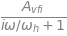

                                                   Ganancia Lazo Cerrado Normalizada                                                   


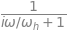

                                                                 Modulo                                                                


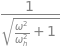

                                                                  Fase                                                                 


                                                            Error Vectorial                                                            


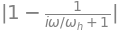

                                                                 Modulo                                                                


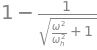

                                                                  Fase                                                                 


In [105]:
W, Wh, Avfi = sym.symbols('omega, omega_h, A_vfi')

Avf=Avfi/(1+sym.I*W/Wh)
print('Ganancia Lazo Cerrado'.center(135))
display(Avf)
print('Ganancia Lazo Cerrado Normalizada'.center(135))
avf=1/(1+sym.I*W/Wh)
display(avf)
print('Modulo'.center(135))
avf_mod=1/sym.sqrt(1+(W/Wh)**2)
display(avf_mod)
print('Fase'.center(135))
avf_arg=-sym.atan(W/Wh)
display(avf_arg)
print('Error Vectorial'.center(135))
Ev=abs(1-avf)
display(Ev)
print('Modulo'.center(135))
Ev_mod=1-1/sym.sqrt(1+(W/Wh)**2)
display(Ev_mod)
print('Fase'.center(135))
Ev_arg=(sym.pi/2) - sym.atan(W/Wh)
display(Ev_arg)

In [110]:
rango = np.arange(0.1,1.1,0.1)
freq  = rango*fh
Avf_m = []
Avf_f = []
Ev_m  = []
Ev_f  = []
for i in range(freq.size):
    Avf_m.append(avf_mod.subs({W:freq[i],Wh:fh}))
    Avf_f.append(avf_arg.subs({W:freq[i],Wh:fh}))
    Ev_m.append(Ev_mod.subs({W:freq[i],Wh:fh}))
    Ev_f.append(Ev_arg.subs({W:freq[i],Wh:fh,sym.pi:np.pi}))
print('AVf Modulo')
print('\n'.join('{}: {:.3f}'.format(*k) for k in enumerate(Avf_m)))
print('AVf Fase')
print('\n'.join('{}: {:.3f}'.format(*k) for k in enumerate(Avf_f)))
print('Error Vectorial Modulo')
print('\n'.join('{}: {:.3f}'.format(*k) for k in enumerate(Ev_m)))
print('Error Vectorial Fase')
print('\n'.join('{}: {:.3f}'.format(*k) for k in enumerate(Ev_f)))

AVf Modulo
0: 0.995
1: 0.981
2: 0.958
3: 0.928
4: 0.894
5: 0.857
6: 0.819
7: 0.781
8: 0.743
9: 0.707
AVf Fase
0: -0.100
1: -0.197
2: -0.291
3: -0.381
4: -0.464
5: -0.540
6: -0.611
7: -0.675
8: -0.733
9: -0.785
Error Vectorial Modulo
0: 0.005
1: 0.019
2: 0.042
3: 0.072
4: 0.106
5: 0.143
6: 0.181
7: 0.219
8: 0.257
9: 0.293
Error Vectorial Fase
0: 1.471
1: 1.373
2: 1.279
3: 1.190
4: 1.107
5: 1.030
6: 0.960
7: 0.896
8: 0.838
9: 0.785
